In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
wn=pd.read_csv('wineQuality.csv')
wn.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

In [4]:
wn.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4888            6.8             0.220         0.36            1.20      0.052   
4889            4.9             0.235         0.27           11.75      0.030   
4890            6.1             0.340         0.29            2.20      0.036   
4891            5.7             0.210         0.32            0.90      0.038   
4892            6.5             0.230         0.38            1.30      0.032   
4893            6.2             0.210         0.29            1.60      0.039   
4894            6.6             0.320         0.36            8.00      0.047   
4895            6.5             0.240         0.19            1.20      0.041   
4896            5.5             0.290         0.30            1.10      0.022   
4897            6.0             0.210         0.38            0.80      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4888                 38.0                 127.0  0.99330  3.04       0.54   
4889                 34.0                 118.0  0.99540  3.07       0.50   
4890                 25.0                 100.0  0.98938  3.06       0.44   
4891                 38.0                 121.0  0.99074  3.24       0.46   
4892                 29.0                 112.0  0.99298  3.29       0.54   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4888      9.2        5  
4889      9.4        6  
4890     11.8        6  
4891     10.6        6  
4892      9.7        5  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [5]:
wn.shape

(4898, 12)

In [6]:
wn.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
wn.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wn.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [10]:
wn['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

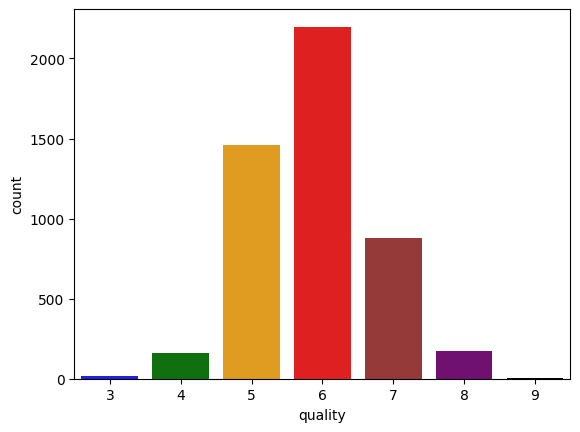

In [11]:
color=['blue','green','orange','red','brown','purple','black']
sns.countplot(x='quality',data=wn,palette=color)
plt.show()

In [12]:
wn['good_quality']=[1 if x>5 else 0 for x in wn['quality']]


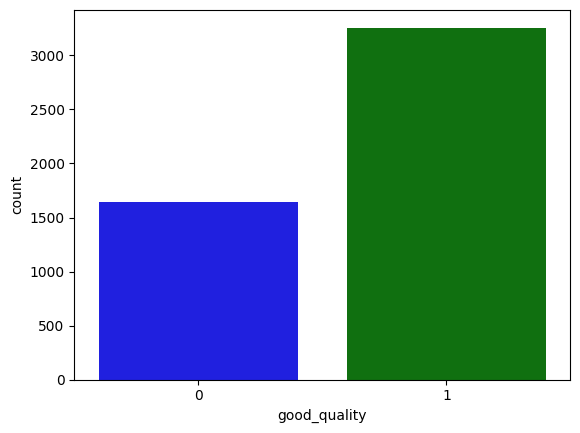

In [13]:
sns.countplot(x='good_quality', data=wn,palette=color)
plt.show()

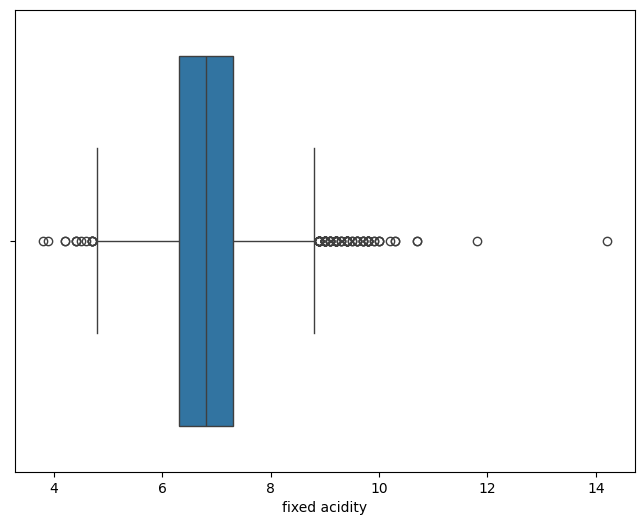

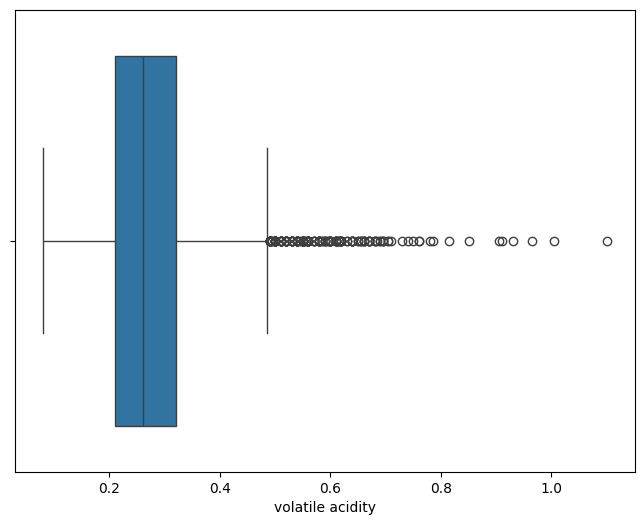

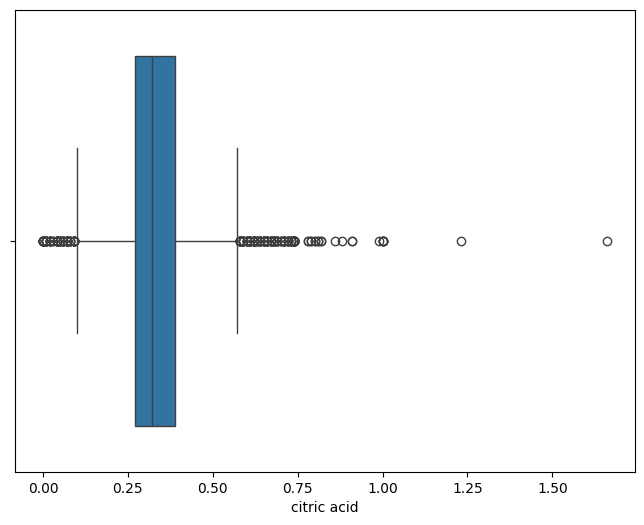

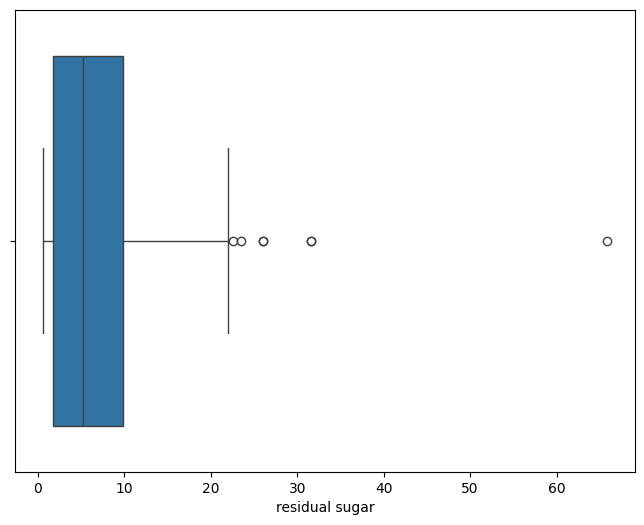

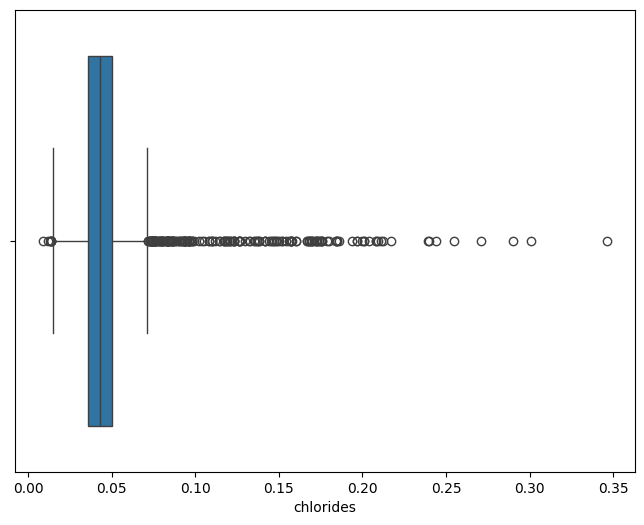

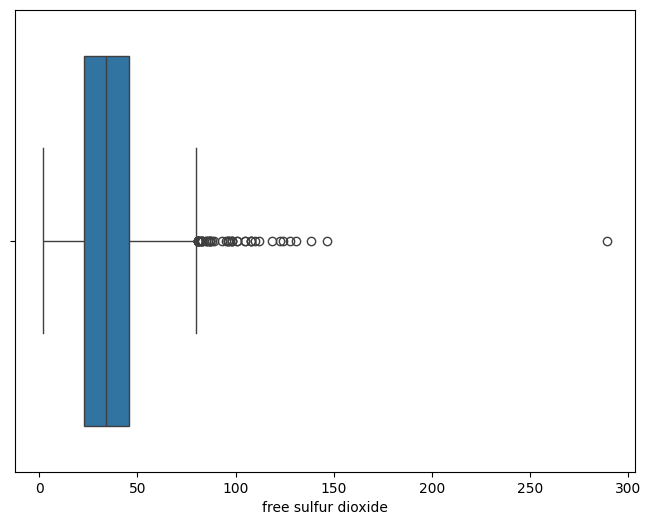

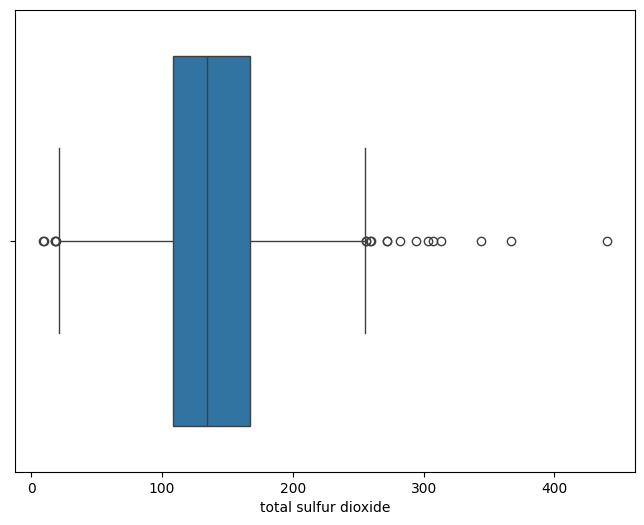

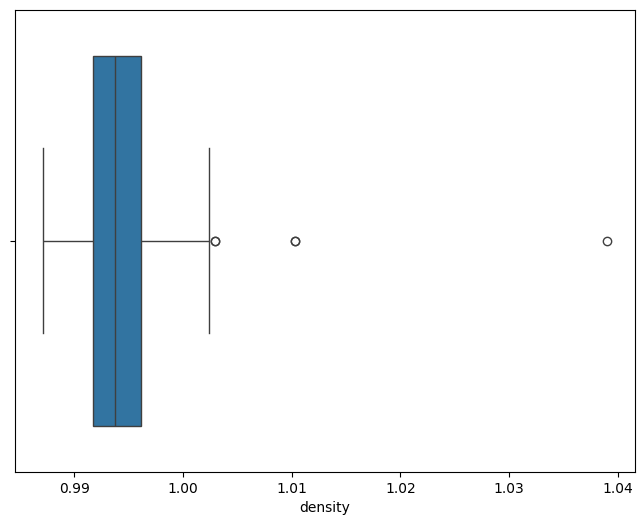

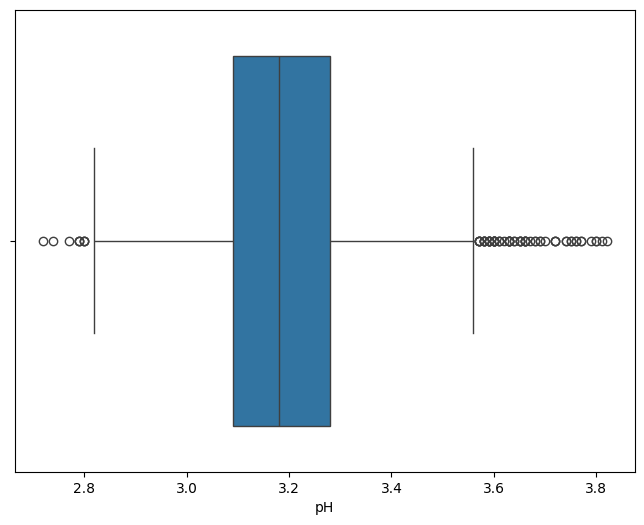

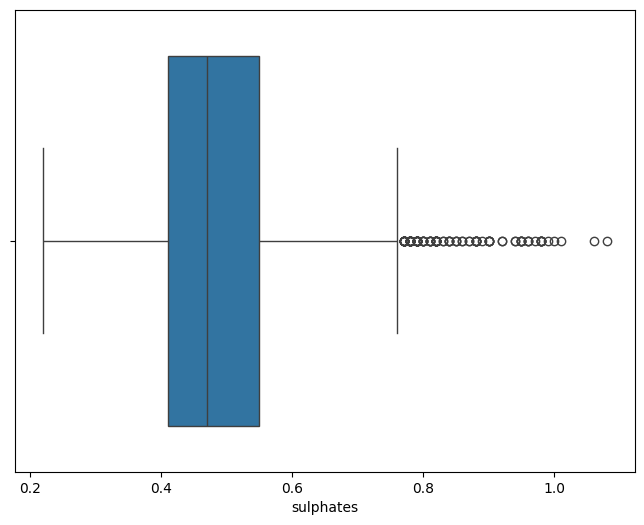

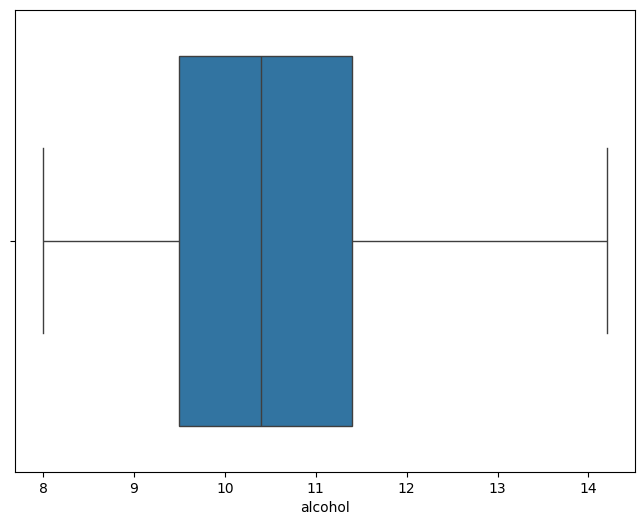

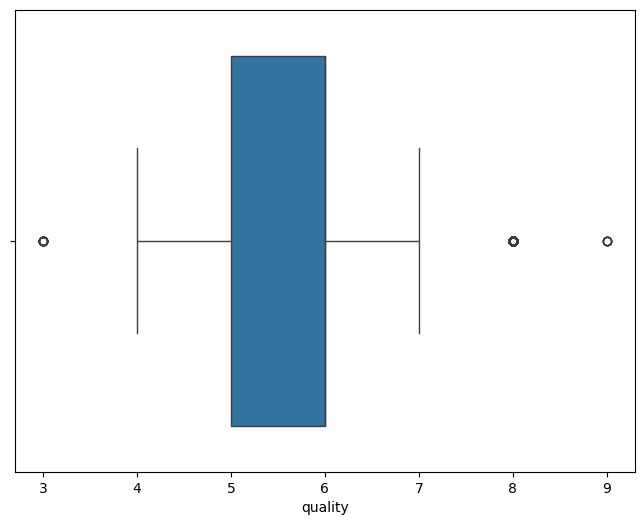

In [14]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol','quality']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature,data=wn)
    plt.show()

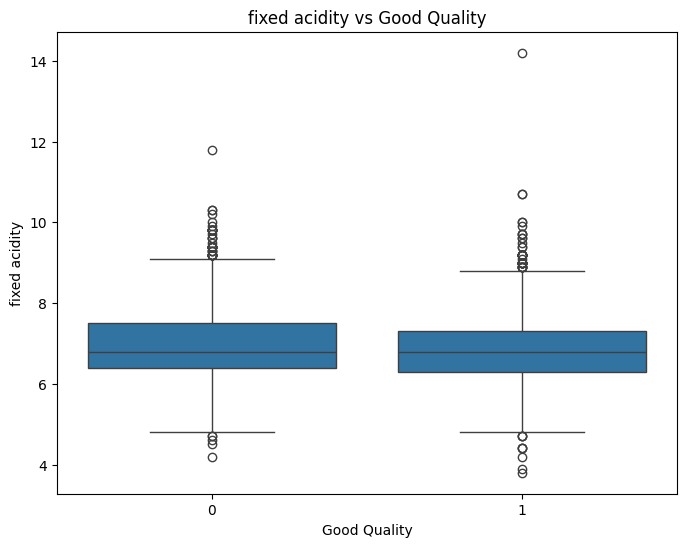

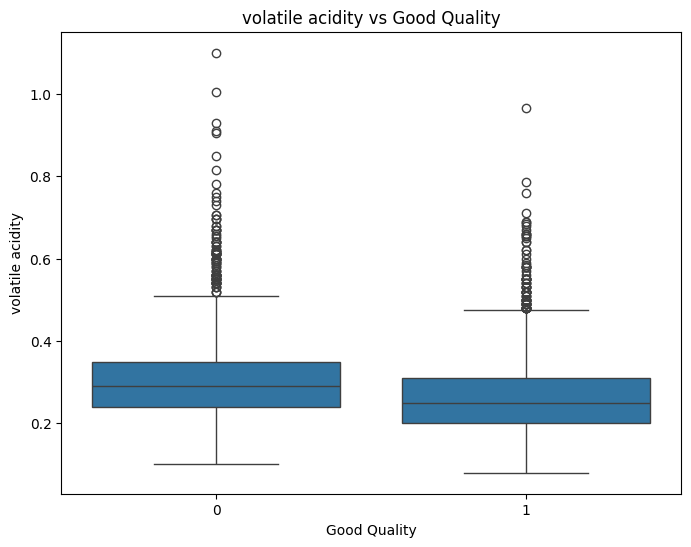

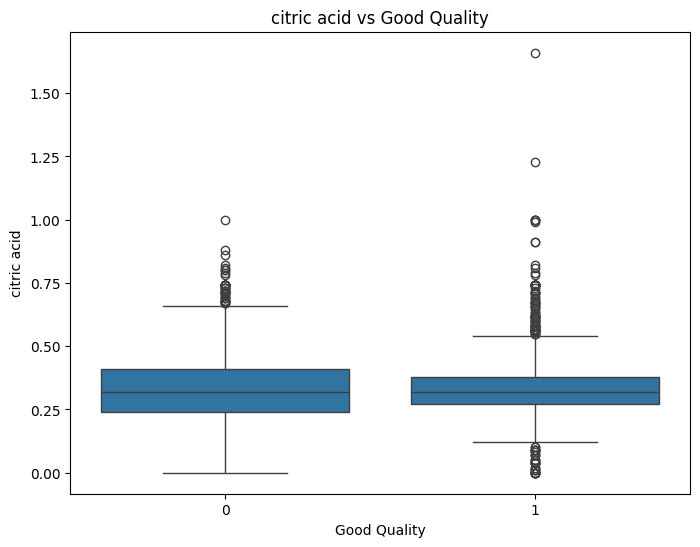

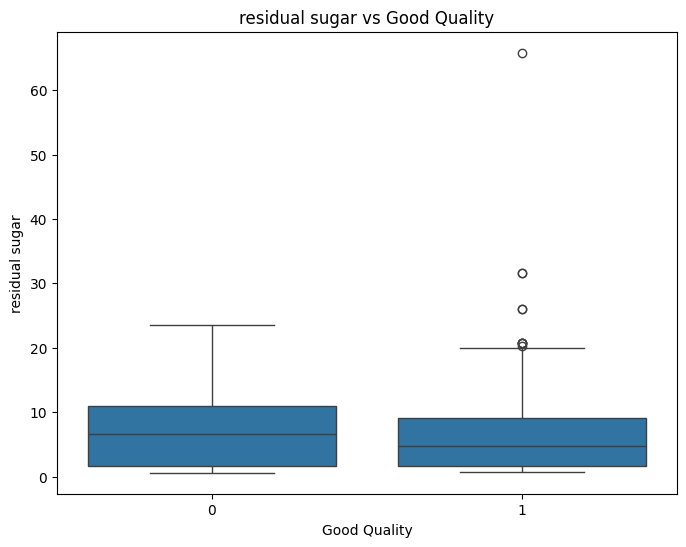

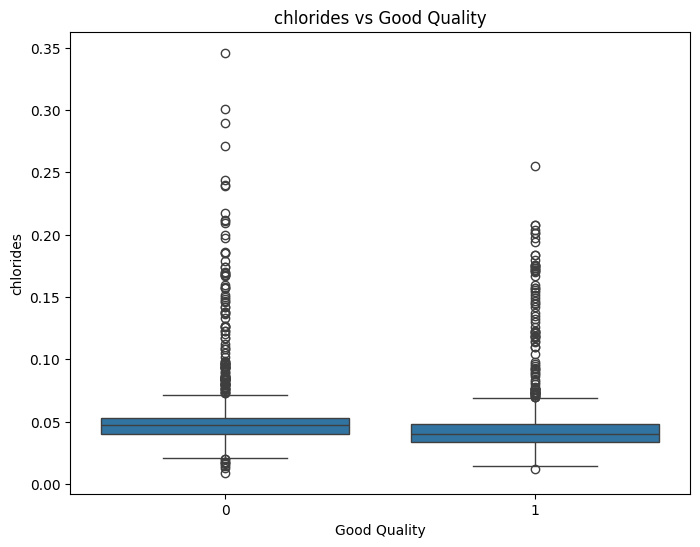

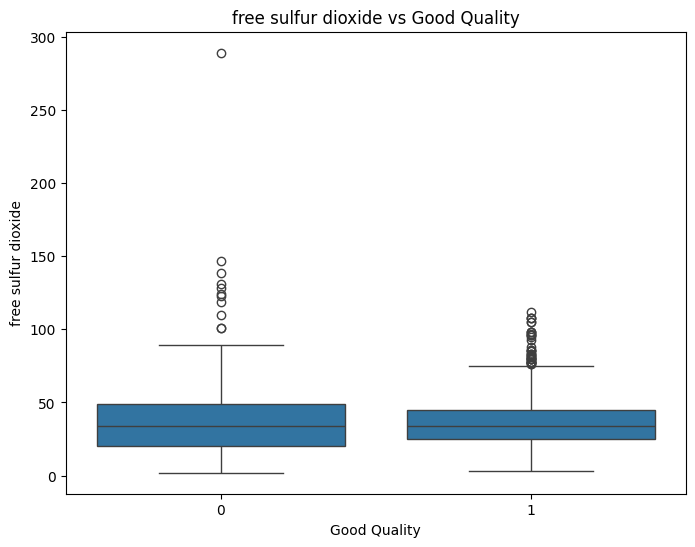

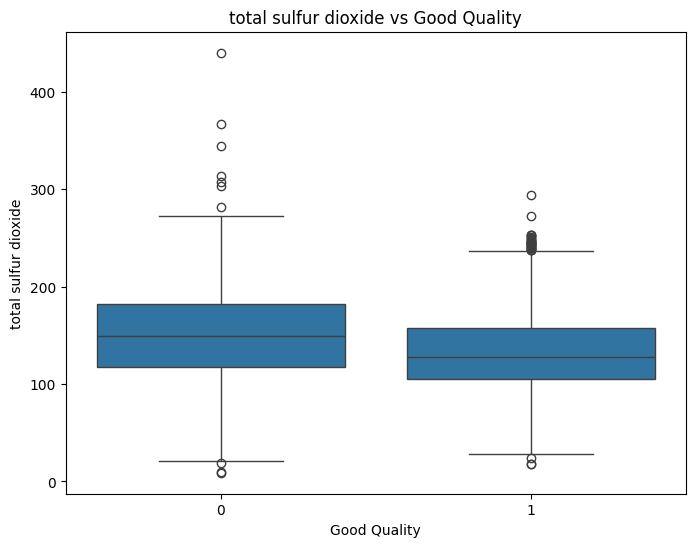

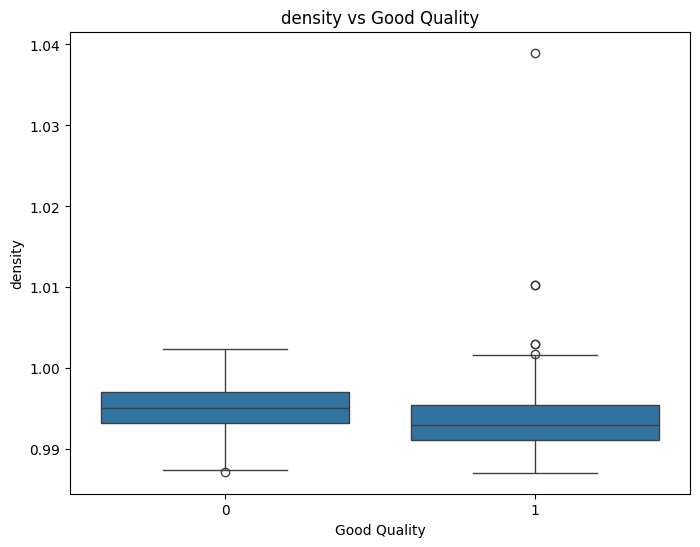

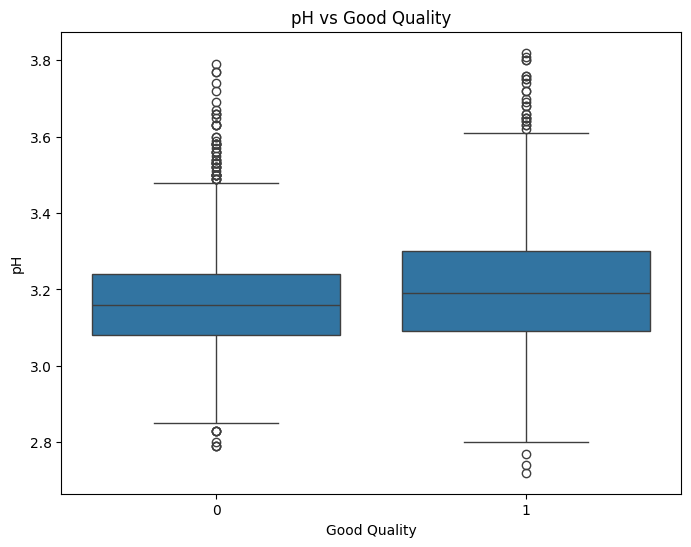

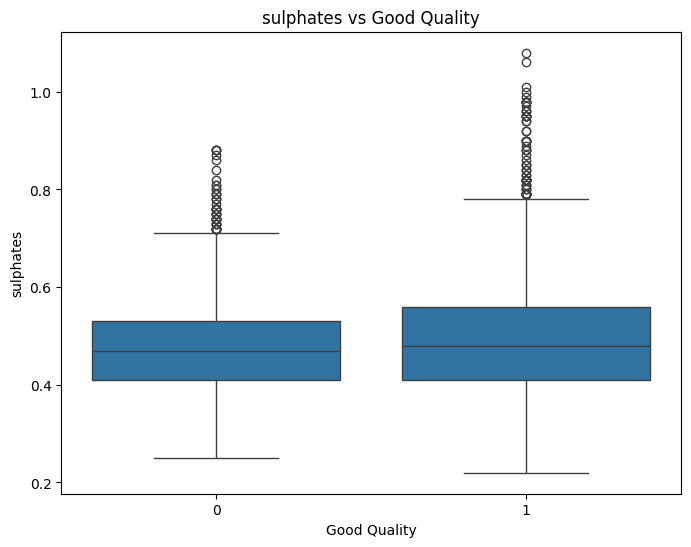

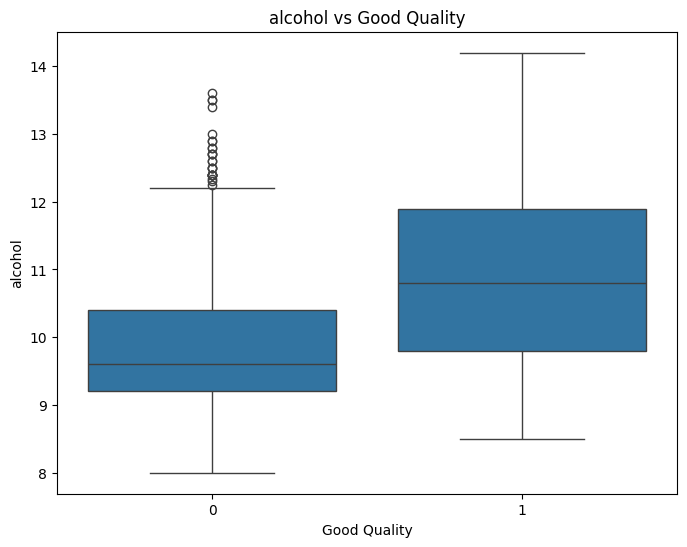

In [15]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Iterate over each feature and create plots
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='good_quality', y=feature, data=wn)
    plt.title(f'{feature} vs Good Quality')
    plt.xlabel('Good Quality')
    plt.ylabel(feature)
    plt.show()

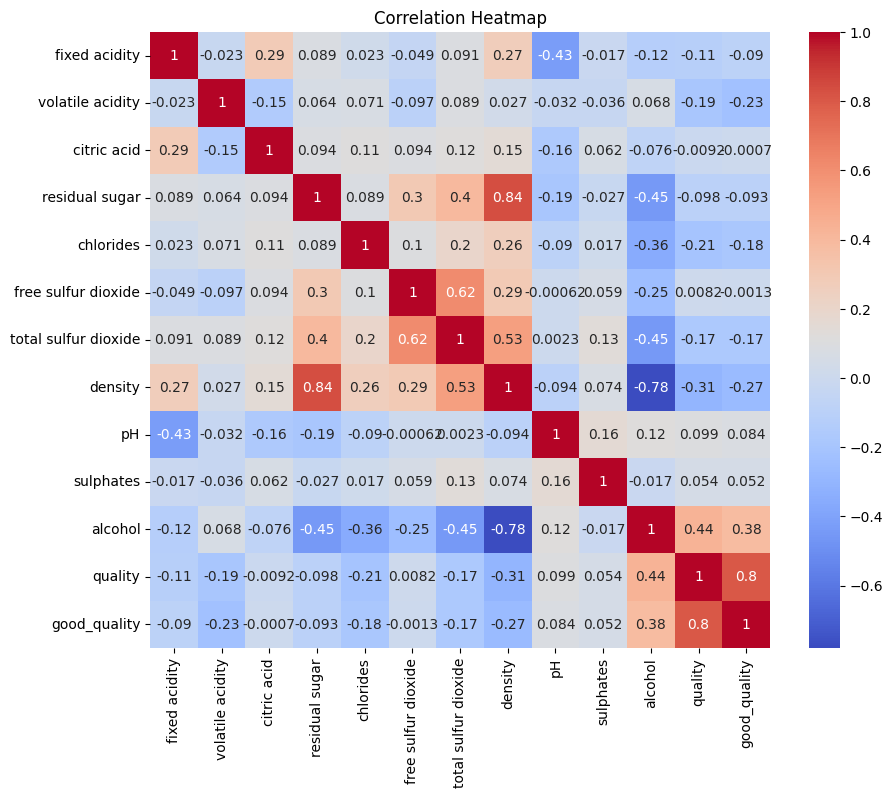

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(wn.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

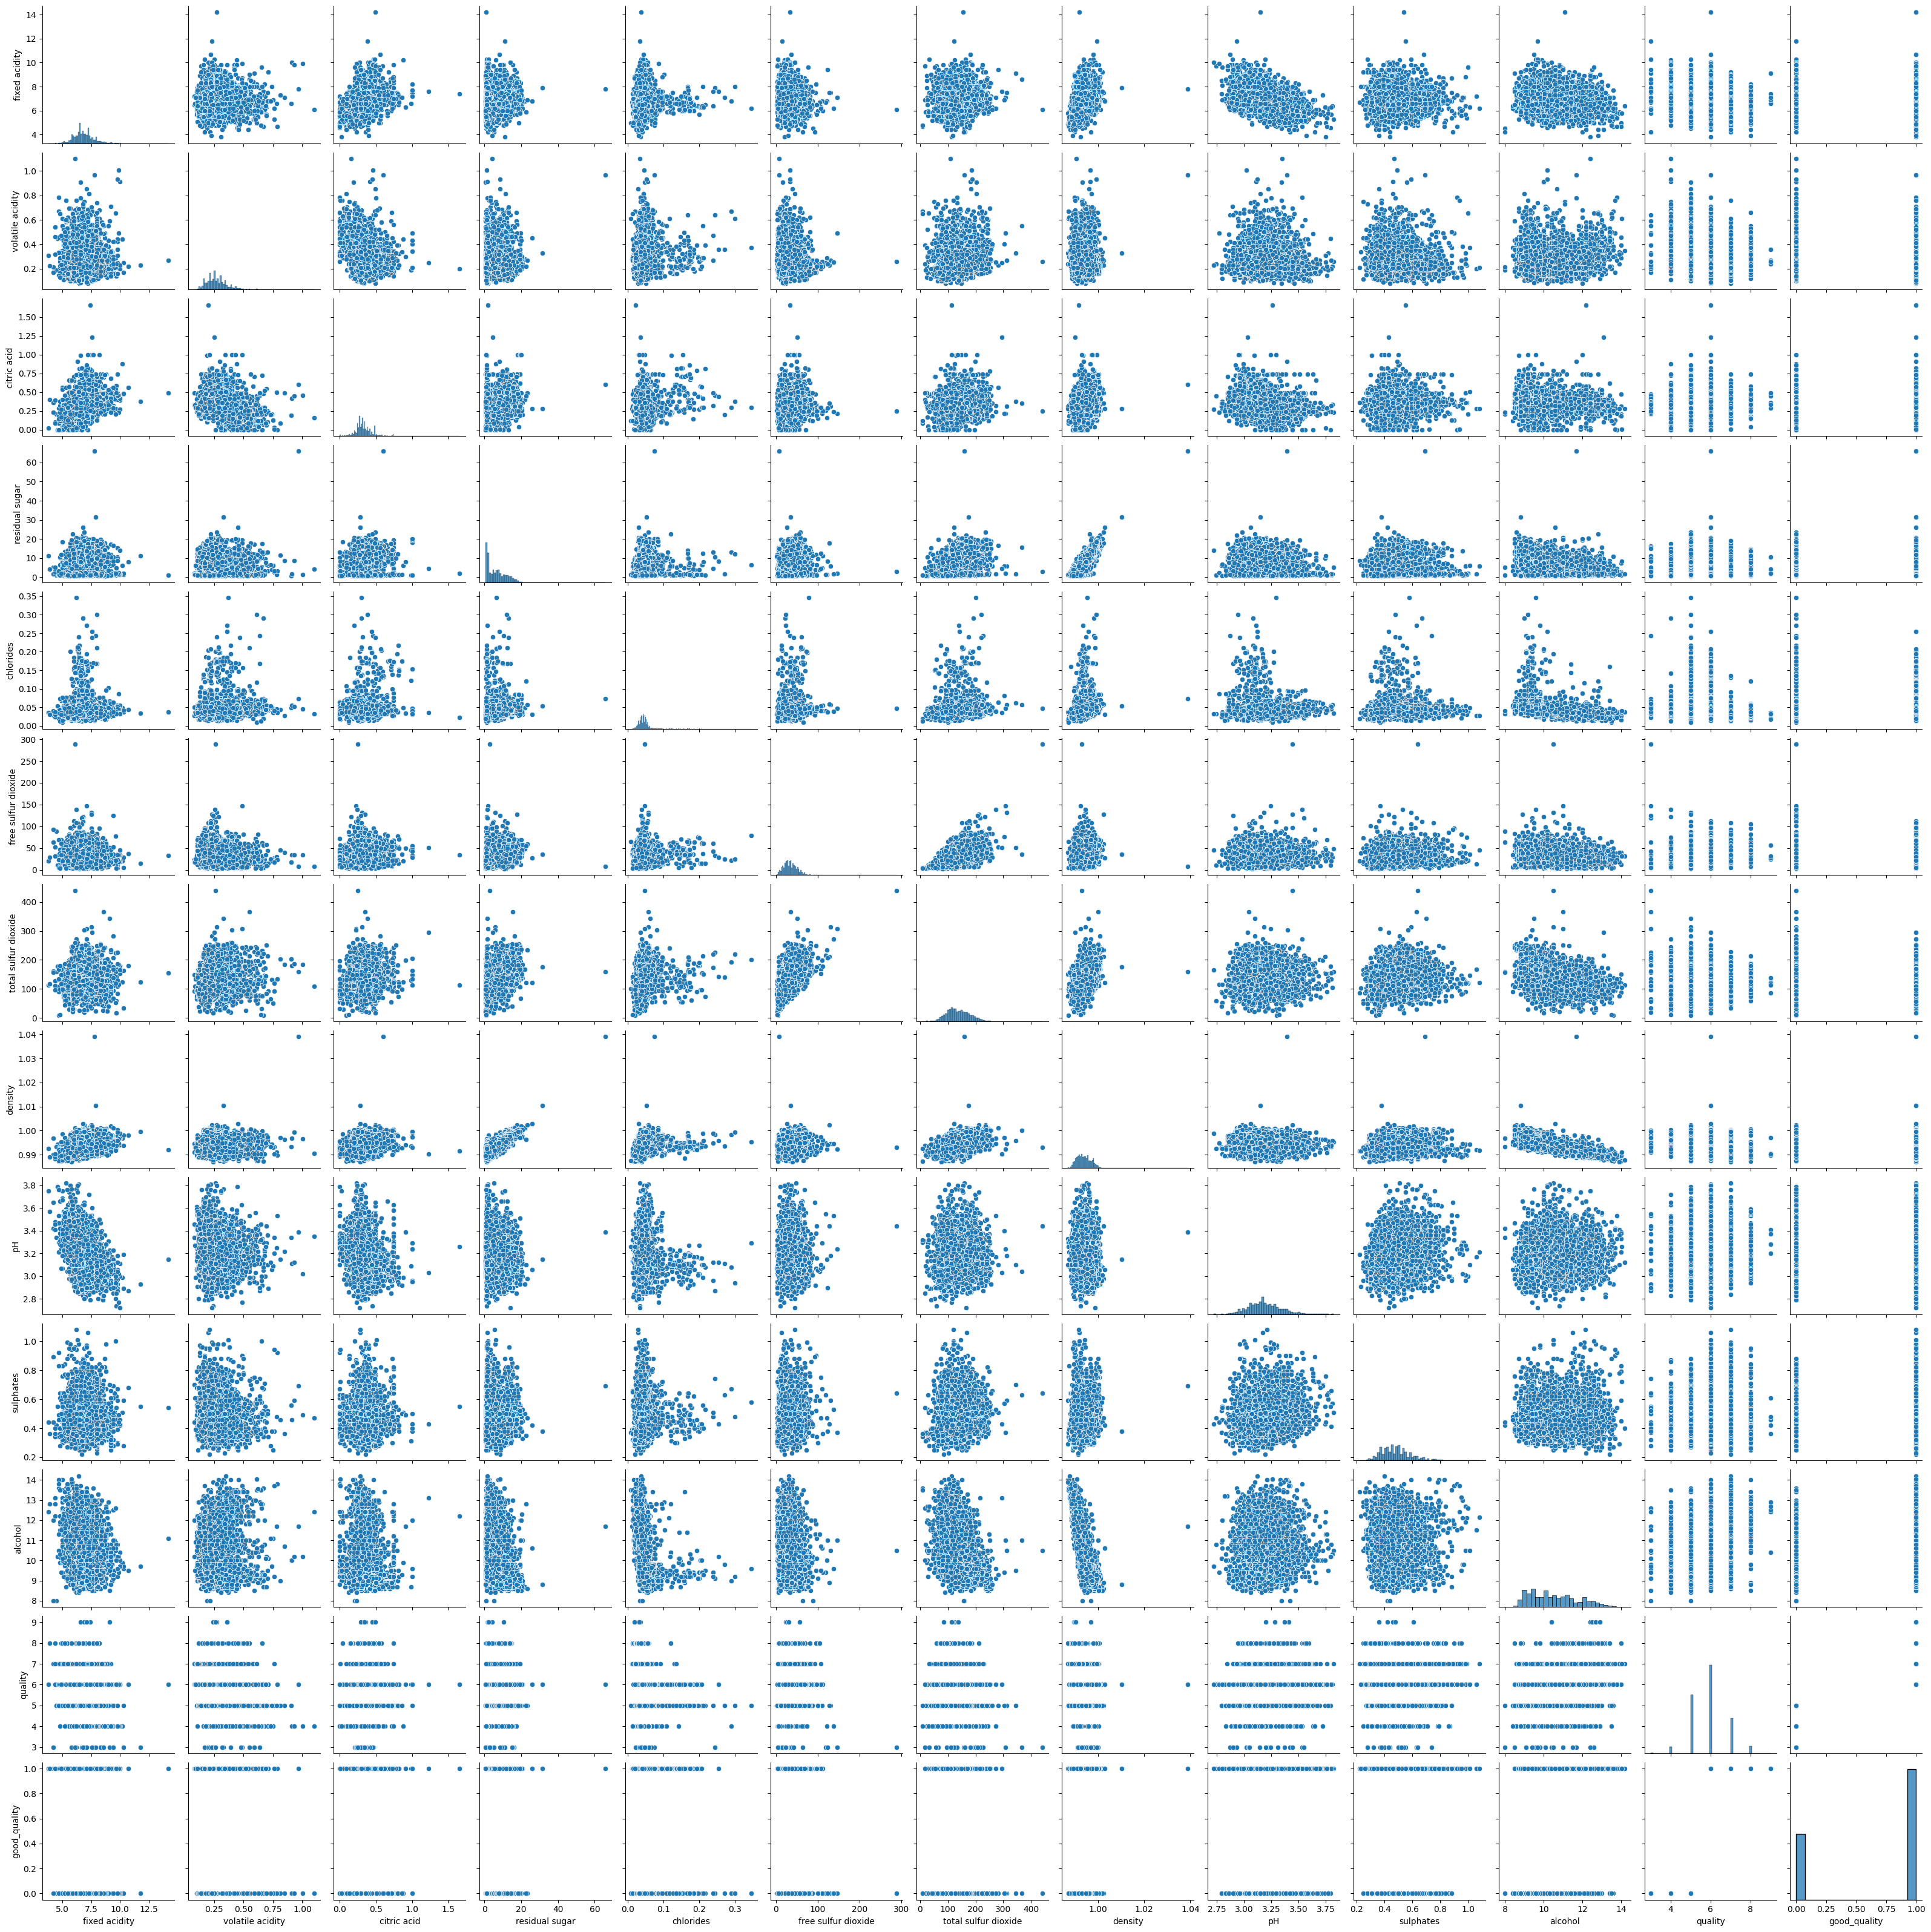

In [17]:
sns.pairplot(wn)

In [18]:
X=wn.drop(columns=['good_quality','quality'],axis=1)
y=wn['good_quality']

In [36]:
X.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4888            6.8             0.220         0.36            1.20      0.052   
4889            4.9             0.235         0.27           11.75      0.030   
4890            6.1             0.340         0.29            2.20      0.036   
4891            5.7             0.210         0.32            0.90      0.038   
4892            6.5             0.230         0.38            1.30      0.032   
4893            6.2             0.210         0.29            1.60      0.039   
4894            6.6             0.320         0.36            8.00      0.047   
4895            6.5             0.240         0.19            1.20      0.041   
4896            5.5             0.290         0.30            1.10      0.022   
4897            6.0             0.210         0.38            0.80      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4888                 38.0                 127.0  0.99330  3.04       0.54   
4889                 34.0                 118.0  0.99540  3.07       0.50   
4890                 25.0                 100.0  0.98938  3.06       0.44   
4891                 38.0                 121.0  0.99074  3.24       0.46   
4892                 29.0                 112.0  0.99298  3.29       0.54   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
4888      9.2  
4889      9.4  
4890     11.8  
4891     10.6  
4892      9.7  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8

In [20]:
y.tail(10)

4888    0
4889    1
4890    1
4891    1
4892    0
4893    1
4894    0
4895    1
4896    1
4897    1
Name: good_quality, dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [23]:
column=['fixed acidity', 'residual sugar',
        'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH',  'alcohol',]

In [24]:
print(len(column))

7


In [25]:
scaler=StandardScaler()
for i in column:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.transform(X_test[[i]])

In [38]:
X_train.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4665       0.515119              0.17         0.36        0.340419      0.028   
1943      -0.669188              0.25         0.44        1.002071      0.041   
3399      -1.498203              0.32         0.33        0.184737      0.037   
843        0.041396              0.19         0.35       -0.924503      0.036   
2580       0.988842              0.30         0.26        2.432407      0.053   
4013      -0.432327              0.46         0.24        0.982611      0.051   
3362       0.396689              0.22         0.28        0.145816      0.060   
4610      -1.142911              0.44         0.36       -0.768820      0.030   
2174       0.633550              0.19         0.30        1.235595      0.053   
2344       0.159827              0.23         0.26        0.145816      0.041   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4665             0.534065             -0.641932 -0.447041 -0.328261   
1943             0.773947              1.355106  0.903370 -0.061886   
3399            -0.605377             -1.022320 -0.460280  0.404271   
843             -0.125612             -0.879675 -0.304718  0.137896   
2580             0.054300              0.855846  1.883079  0.071302   
4013             1.253712              0.784523  0.598865 -0.727824   
3362             0.354153             -0.142673 -0.188874 -0.727824   
4610            -1.384995             -1.545354 -0.682039  0.204490   
2174             0.803932              2.163430  1.499139 -0.328261   
2344            -0.845260             -1.141192  0.337389  0.204490   

      sulphates   alcohol  
4665       0.41  1.540371  
1943       0.52 -0.821712  
3399       0.49  0.481506  
843        0.54  0.237153  
2580       0.50 -0.088652  
4013       0.56 -0.577359  
3362       0.59  0.644408  
4610       0.48  0.237153  
2174       0.49 -1.147517  
2344       0.55 -0.821712

In [27]:
clfs=[LogisticRegression(),SVC(kernel='rbf'),DecisionTreeClassifier(max_depth=20,random_state=0,criterion='entropy'),DecisionTreeClassifier(min_samples_leaf=10,criterion='entropy'),RandomForestClassifier(random_state=42)]

In [28]:
model_aucc={}
for clf in clfs:
    print(f'Model {clf}')
    clf.fit(X_train,Y_train)    
    print(f'Training Score: {clf.score(X_train,Y_train)*100}')
    print(f'Test Score: {clf.score(X_test,Y_test)*100}')
    model_aucc.update({clf:clf.score(X_test,Y_test)})

    print('---------------------------------')

Model LogisticRegression()
Training Score: 74.73200612557427
Test Score: 74.18367346938776
---------------------------------
Model SVC()
Training Score: 79.17304747320061
Test Score: 75.40816326530613
---------------------------------
Model DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)
Training Score: 99.64267483409903
Test Score: 79.89795918367348
---------------------------------
Model DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
Training Score: 85.86013272077591
Test Score: 76.63265306122449
---------------------------------
Model RandomForestClassifier(random_state=42)
Training Score: 100.0
Test Score: 84.28571428571429
---------------------------------


In [29]:
evaluation_metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "ROC-AUC": roc_auc_score
}

for clf in clfs:
    print(f'Model: {clf}')
    clf.fit(X_train, Y_train)
    
    for metric_name, metric_func in evaluation_metrics.items():
        if metric_name == "ROC-AUC" and hasattr(clf, "decision_function"):
            y_pred = clf.decision_function(X_test)
        else:
            y_pred = clf.predict(X_test)
        
        score = metric_func(Y_test, y_pred)
        print(f'{metric_name}: {score:.4f}')
        
    print('---------------------------------')

Model: LogisticRegression()
Accuracy: 0.7418
Precision: 0.7743
Recall: 0.8695
F1 Score: 0.8192
ROC-AUC: 0.7914
---------------------------------
Model: SVC()
Accuracy: 0.7541
Precision: 0.7927
Recall: 0.8589
F1 Score: 0.8245
ROC-AUC: 0.8172
---------------------------------
Model: DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)
Accuracy: 0.7990
Precision: 0.8521
Recall: 0.8483
F1 Score: 0.8502
ROC-AUC: 0.7730
---------------------------------
Model: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
Accuracy: 0.7653
Precision: 0.8265
Recall: 0.8240
F1 Score: 0.8252
ROC-AUC: 0.7344
---------------------------------
Model: RandomForestClassifier(random_state=42)
Accuracy: 0.8429
Precision: 0.8708
Recall: 0.8998
F1 Score: 0.8851
ROC-AUC: 0.8129
---------------------------------


In [30]:
model_aucc.values()

dict_values([0.7418367346938776, 0.7540816326530613, 0.7989795918367347, 0.7663265306122449, 0.8428571428571429])

In [31]:
data={'model':['Logistic_regression','SVM','DecisionTree1','DecisionTree2','RandomForest'],
      'score':[0.7418367346938776, 0.7540816326530613, 0.7989795918367347, 0.7663265306122449, 0.8428571428571429]
      }
data_Score=pd.DataFrame(data)

In [32]:
data_Score

model     score
0  Logistic_regression  0.741837
1                  SVM  0.754082
2        DecisionTree1  0.798980
3        DecisionTree2  0.766327
4         RandomForest  0.842857

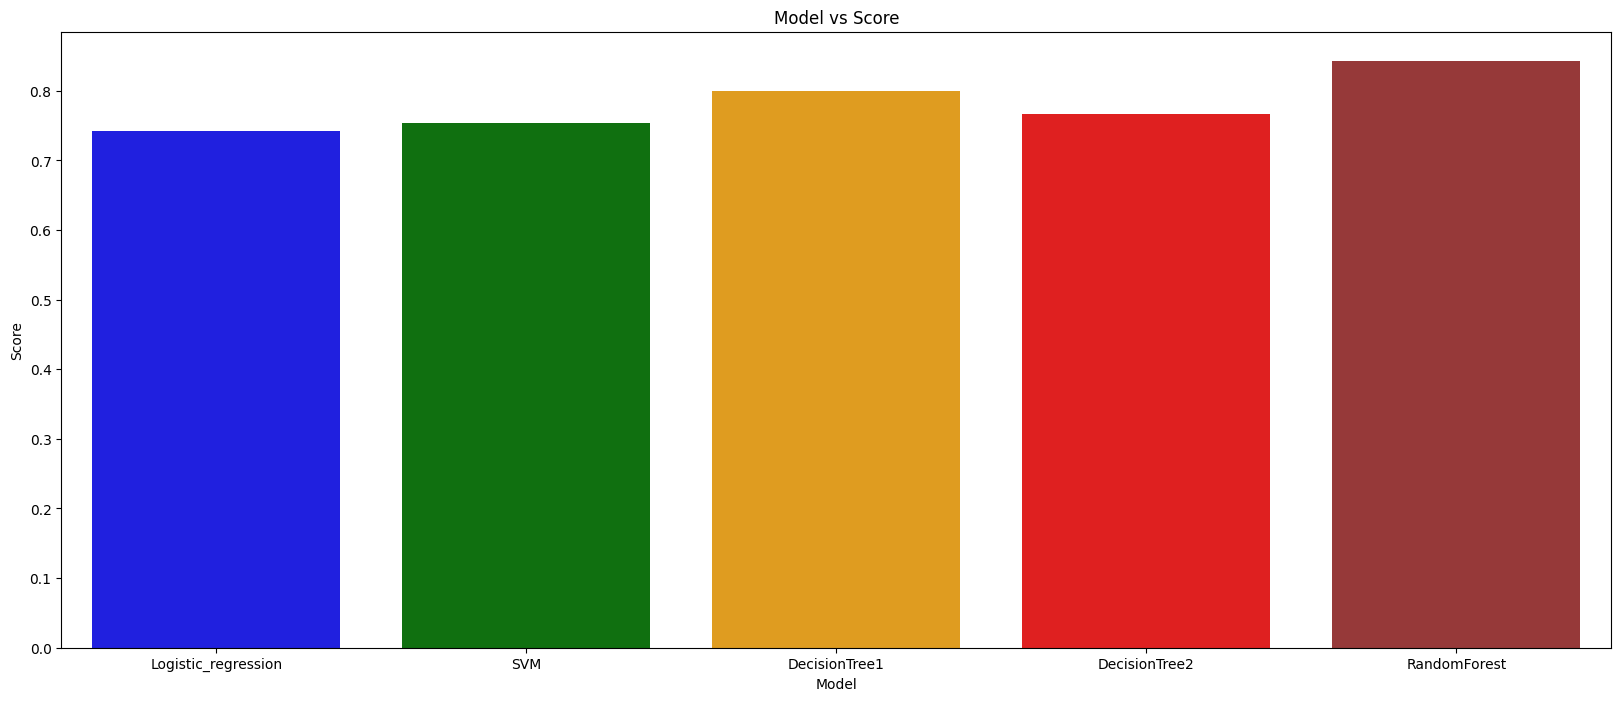

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(x='model',y='score',data=data_Score,palette=color)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model vs Score')
plt.show()

In [34]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [35]:
with open('wine_quality_model','wb')as f:
    pickle.dump(model,f)